<h1 style="color:blue;"> Experimento de crescimento de plantas</h1>

Neste notebook, vamos aplicar técnicas de planejamento de experimentos para estudar os efeitos da luz e da água na altura de uma planta.

Usaremos um planejamento fatorial 2² (dois fatores com dois níveis cada) e ajustaremos um modelo de regressão linear para entender os efeitos desses fatores e suas interações.

## Configurações

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t

# !pip install pyDOE2
from pyDOE2 import ff2n

sns.set(style="whitegrid")

Essas bibliotecas nos permitirão:

    Manipular dados (NumPy, Pandas);
    Realizar análises estatísticas (StatsModels);
    Criar visualizações (Matplotlib, Seaborn);
    Gerar o design fatorial (pyDOE2).

## Definição de Fatores e Níveis

Vamos definir os fatores do experimento:

    Luz: horas de luz por dia, com níveis baixo (0 horas) e alto (12 horas).
    Água: mililitros de água por dia, com níveis baixo (0 ml) e alto (100 ml).

Usaremos um planejamento fatorial 2², que gera todas as combinações possíveis desses níveis.

In [4]:
# design fatorial 2²
design = ff2n(2)
design_df = pd.DataFrame(design, columns=['Luz', 'Água'])
design_df

,Luz,Água
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


-1 representa o nível baixo (0 horas de luz ou 0 ml de água).

1 representa o nível alto (12 horas de luz ou 100 ml de água).

In [5]:
# mapear valores normalizados [-1,1]
design_df['Luz_Real'] = design_df['Luz'].map({-1: 0, 1: 12})
design_df['Água_Real'] = design_df['Água'].map({-1: 0, 1: 100})
design_df

,Luz,Água,Luz_Real,Água_Real
0,-1.0,-1.0,0,0
1,1.0,-1.0,12,0
2,-1.0,1.0,0,100
3,1.0,1.0,12,100


## Coleta de Dados Simulados

Como este é um exemplo inicial, vamos simular os dados da altura da planta. Em um experimento real, você substituiria isso por medições reais.

Vamos assumir que a altura segue este modelo:

Altura=5+2⋅Luz+1.5⋅Agua+0.5⋅Luz⋅Agua+e

onde e é um erro aleatório.

In [6]:
# coeficientes
beta_0 = 5    # intercepto
beta_1 = 2    # luz
beta_2 = 1.5  # agua
beta_3 = 0.5  # luz.agua

# gerar dados
np.random.seed(42)
erro = np.random.normal(0, 0.5, 4)
altura = beta_0 + beta_1 * design[:, 0] + beta_2 * design[:, 1] + beta_3 * design[:, 0] * design[:, 1] + erro

design_df['Altura'] = altura
design_df[['Luz_Real', 'Água_Real', 'Altura']]

,Luz_Real,Água_Real,Altura
0,0,0,2.248357
1,12,0,4.930868
2,0,100,4.323844
3,12,100,9.761515


## Análise Gráfica

Vamos visualizar os efeitos da luz e da água na altura da planta.

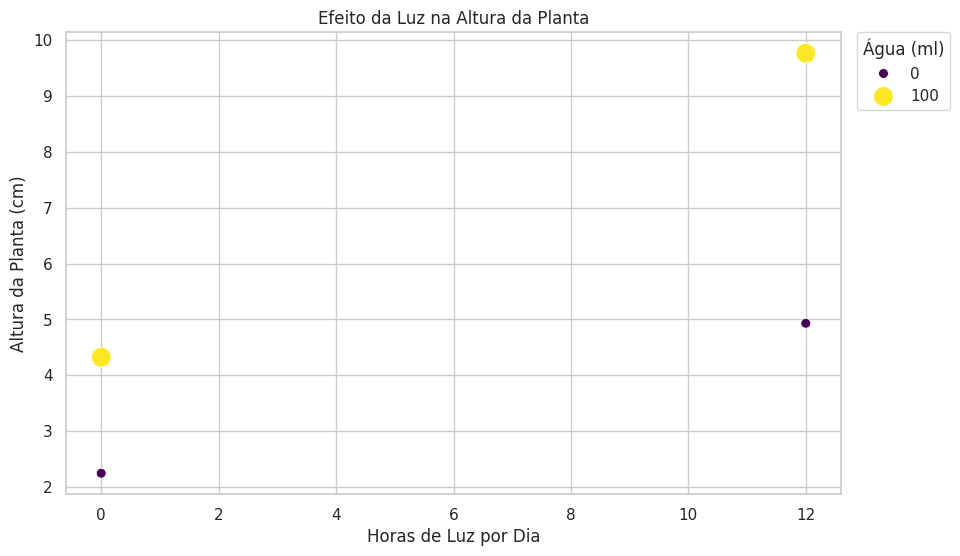

In [20]:
# efeito da luz na altura, hue agua
plt.figure(figsize=(10, 6))
sns.scatterplot(data=design_df, x='Luz_Real', y='Altura', hue='Água_Real', size='Água_Real', sizes=(50,200), palette='viridis')
plt.title('Efeito da Luz na Altura da Planta')
plt.xlabel('Horas de Luz por Dia')
plt.ylabel('Altura da Planta (cm)')
plt.legend(title='Água (ml)',bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

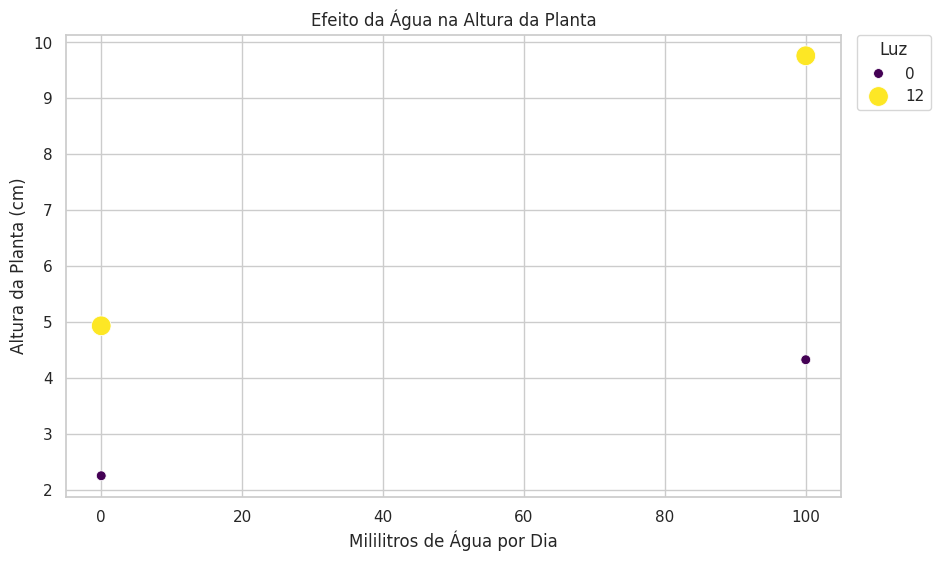

In [22]:
# efeito agua na altura, hue luz
plt.figure(figsize=(10, 6))
sns.scatterplot(data=design_df, x='Água_Real', y='Altura', hue='Luz_Real', size='Luz_Real', sizes=(50,200), palette='viridis')
plt.title('Efeito da Água na Altura da Planta')
plt.xlabel('Mililitros de Água por Dia')
plt.ylabel('Altura da Planta (cm)')
plt.legend(title='Luz',bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

Os gráficos mostram que a altura da planta aumenta com mais luz e mais água.

A diferença nas alturas sugere que a luz e a água têm efeitos positivos.

## Modelagem Estatística Inicial

Agora, ajustaremos um modelo de regressão linear para quantificar os efeitos.

In [23]:
modelo = ols('Altura ~ Luz + Água + Luz:Água', data=design_df).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 Altura   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 11 Mar 2025   Prob (F-statistic):                nan
Time:                        17:01:57   Log-Likelihood:                 132.41
No. Observations:                   4   AIC:                            -256.8
Df Residuals:                       0   BIC:                            -259.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3161        inf          0        n

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1527: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normal

## Aumento de graus de liberdade

Uma prática comum em planejamentos fatoriais é adicionar pontos centrais ao design experimental.

Esses pontos ajudam a avaliar a adequação do modelo linear e fornecem mais dados para estimar a variabilidade residual, permitindo testes estatísticos robustos.

No design fatorial original, temos 4 pontos (combinações de Luz e Água em níveis -1 e 1). Vamos adicionar, por exemplo, 4 pontos centrais, onde:

    Luz = 0 (nível intermediário, correspondendo a 6 horas de luz, assumindo que -1 = 0 horas e 1 = 12 horas).
    Água = 0 (nível intermediário, correspondendo a 50 ml de água, assumindo que -1 = 0 ml e 1 = 100 ml).

Isso aumentará o número total de observações de 4 para 8, proporcionando graus de liberdade aos resíduos.

In [26]:
modelo.params

,0
Intercept,5.316146
Luz,2.030045
Água,1.726534
Luz:Água,0.688790


In [29]:
# erro aleatorio
erro_center = np.random.normal(0, 0.5, 4)
altura_center = modelo.params['Intercept'] + erro_center
altura_center

array([5.19906934, 5.19907755, 6.10575244, 5.6998634 ])

In [30]:
# df com pontos centrais
center_points = pd.DataFrame({
    'Luz': [0]*4,
    'Água': [0]*4,
    'Altura': altura_center
})
center_points

,Luz,Água,Altura
0,0,0,5.199069
1,0,0,5.199078
2,0,0,6.105752
3,0,0,5.699863


In [31]:
design_df = pd.DataFrame({
    'Luz': [-1, 1, -1, 1],
    'Água': [-1, -1, 1, 1],
    'Altura': [5.3161 - 2.0300 - 1.7265 + 0.6888*(-1)*(-1),  # Exemplo com erro zero
               5.3161 + 2.0300 - 1.7265 + 0.6888*(1)*(-1),
               5.3161 - 2.0300 + 1.7265 + 0.6888*(-1)*(1),
               5.3161 + 2.0300 + 1.7265 + 0.6888*(1)*(1)]
})
design_df

,Luz,Água,Altura
0,-1,-1,2.2484
1,1,-1,4.9308
2,-1,1,4.3238
3,1,1,9.7614


In [33]:
# Combinar os dados
experimento_completo = pd.concat([design_df, center_points], ignore_index=True)
experimento_completo

,Luz,Água,Altura
0,-1,-1,2.248400
1,1,-1,4.930800
2,-1,1,4.323800
3,1,1,9.761400
4,0,0,5.199069
5,0,0,5.199078
6,0,0,6.105752
7,0,0,5.699863


## Modelo Ajustado

In [35]:
modelo_completo = ols('Altura ~ Luz + Água + Luz:Água', data=experimento_completo).fit()
print(modelo_completo.summary())

                            OLS Regression Results                            
Dep. Variable:                 Altura   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     58.74
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           0.000917
Time:                        17:48:46   Log-Likelihood:                -1.5374
No. Observations:                   8   AIC:                             11.07
Df Residuals:                       4   BIC:                             11.39
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4335      0.147     37.059      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


## Teste de significância

Vamos verificar quais termos do modelo são importantes usando testes estatísticos.

In [37]:
# t critico (95% de confiança)
df = len(experimento_completo) - 4  # graus de liberdade
t_critico = t.ppf(1 - 0.05/2, df)
t_critico

2.7764451051977987

In [38]:
# t do modelo
t_valores = modelo_completo.tvalues
t_valores

,0
Intercept,37.058578
Luz,9.790131
Água,8.326434
Luz:Água,3.321893


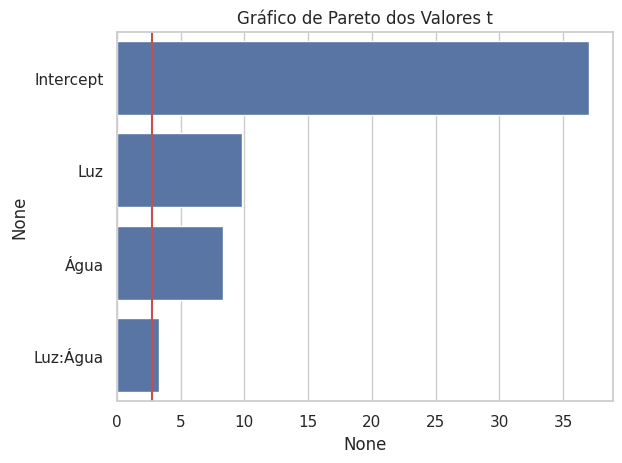

In [39]:
# plot pareto
pareto = sns.barplot(x=t_valores, y=t_valores.index)
pareto.axvline(x=t_critico, color='r')
plt.title('Gráfico de Pareto dos Valores t')
plt.show()

Ao adicionar 4 pontos centrais, aumentamos os graus de liberdade do modelo, possibilitando a realização de testes de significância.

Os resultados mostram que os efeitos de Luz, Água e sua interação são estatisticamente significativos, confirmando sua importância para a altura da planta. Esse modelo ajustado pode agora ser usado com confiança para previsões e análises adicionais, como em um portfólio interativo.

## Avaliação do modelo

R² aproximado de 97.8% indica que o modelo explica bem a variabilidade dos dados, ainda assim, vamos comparar as previsões do modelo com os dados reais graficamente.

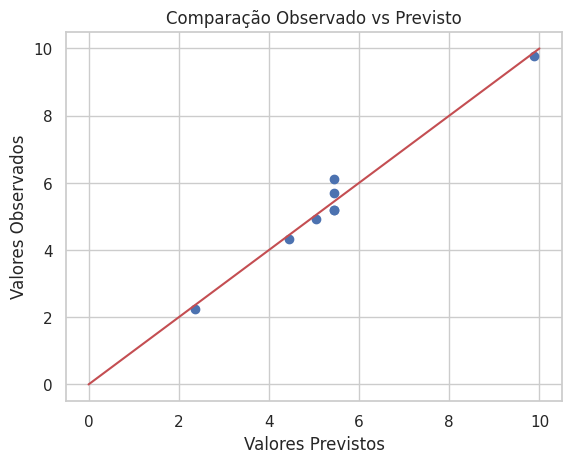

In [41]:
# observados e previstos
observados = experimento_completo['Altura']
preditos = modelo_completo.predict()

# plot
plt.scatter(preditos, observados)
plt.plot([0, 10], [0, 10], 'r')  # y=x
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Observados')
plt.title('Comparação Observado vs Previsto')
plt.show()

